## Plots used in our publication

Facts we found in our data weren't used in the learning process so they're just fun facts about our results and examined people.


In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)


from data_extractor.data_extractor import load_df

In [2]:
import mne
import pandas as pd
import numpy as np

In [3]:
df = load_df("../data/")
# Filter the data and add the column 'label' depends what you need
df = df.query("desired_answer == answer and data_type in ['REAL', 'FAKE']")
df['label'] = df.apply(lambda x: 1 if x.block_no in [1,3] else 0, axis = 1)
df.head()

Opening raw data file ../data/1299BF1A/EEG_ExperimentBlock.HONEST_RESPONSE_TO_TRUE_IDENTITY_raw.fif...
    Range : 0 ... 70174 =      0.000 ...   280.696 secs
Ready.
Reading 0 ... 70174  =      0.000 ...   280.696 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, ze

,subject,block_no,duration,field,data_type,answer,eeg,desired_answer,label
1,1299BF1A,1,0.840,BIRTH_DATE,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
2,1299BF1A,1,0.744,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
3,1299BF1A,1,0.676,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
4,1299BF1A,1,0.620,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1
6,1299BF1A,1,0.652,NAME,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1


In [4]:
participant_info_df = pd.read_csv("participant_info.csv")

# Simulate participant_info.csv data from previous data
# participant_info.csv contains basic info about anonimized 
participant_info_df = pd.DataFrame(participant_info_df)

# Filter out rows where "uwagi" (comments) contains "zespute" (broken)
filtered_participant_info_df = participant_info_df[~participant_info_df["comments"].str.contains("broken", na=False)]


df = pd.merge(df, filtered_participant_info_df, how="left", left_on="subject", right_on="UUID")
df.drop(columns=["UUID"], inplace=True)

In [5]:
df.head()

,subject,block_no,duration,field,data_type,answer,eeg,desired_answer,label,Sex,Age,comments
0,1299BF1A,1,0.840,BIRTH_DATE,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,NaN
1,1299BF1A,1,0.744,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,NaN
2,1299BF1A,1,0.676,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,NaN
3,1299BF1A,1,0.620,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,NaN
4,1299BF1A,1,0.652,NAME,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,NaN


In [6]:
unique_subjects = df[['subject', 'Sex', 'Age']].drop_duplicates()
unique_subjects.reset_index(drop=True, inplace=True)
print(unique_subjects)

     subject Sex  Age
0   1299BF1A   K   23
1   DAF24E45   M   26
2   827366EC   M   22
3   2D663E30   M   22
4   02F6BC66   M   22
5   SDF673HF   M   24
6   A59D58F4   K   26
7   FF0DC21C   K   22
8   BNFH348D   K   21
9   ASD6DSA7   K   21
10  E52DEA2D   M   20
11  4C0F44CF   M   25
12  A3627947   K   22
13  HFDY7643   K   26
14  8DB745E3   K   19


In [7]:
df.drop(columns=['comments'], inplace=True)

df.head()

,subject,block_no,duration,field,data_type,answer,eeg,desired_answer,label,Sex,Age
0,1299BF1A,1,0.840,BIRTH_DATE,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23
1,1299BF1A,1,0.744,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23
2,1299BF1A,1,0.676,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23
3,1299BF1A,1,0.620,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23
4,1299BF1A,1,0.652,NAME,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23


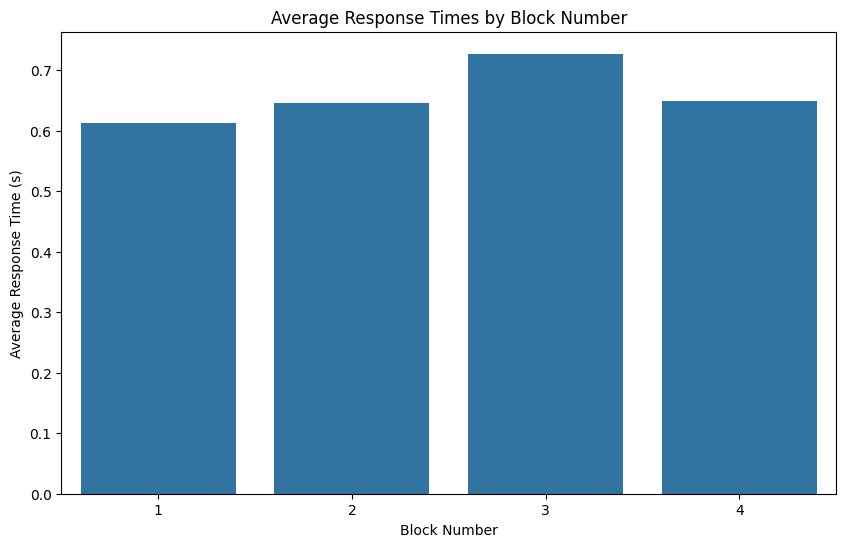

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the average response time
average_response_times = df.groupby('block_no')['duration'].mean().reset_index()

# Plot the average response times
plt.figure(figsize=(10, 6))
sns.barplot(x='block_no', y='duration', data=average_response_times)
plt.xlabel('Block Number')
plt.ylabel('Average Response Time (s)')
plt.title('Average Response Times by Block Number')
plt.show()

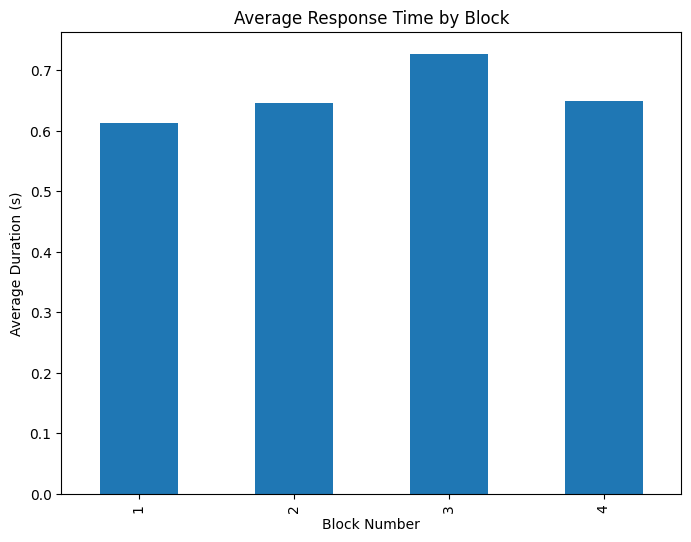

In [9]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
df.groupby("block_no")["duration"].mean().plot(kind='bar')
plt.title("Average Response Time by Block")
plt.xlabel("Block Number")
plt.ylabel("Average Duration (s)")
plt.show()


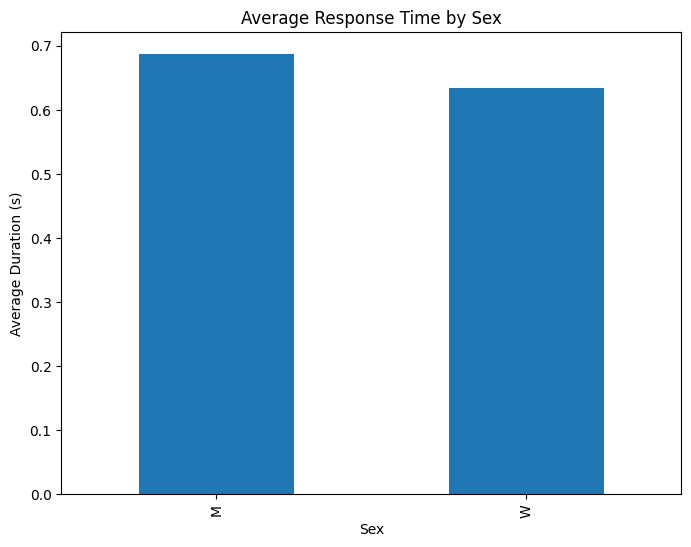

In [25]:

plt.figure(figsize=(8, 6))
df['Sex'] = df['Sex'].replace('K', 'W')
df.groupby("Sex")["duration"].mean().plot(kind='bar')
plt.title("Average Response Time by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Duration (s)")
plt.show()


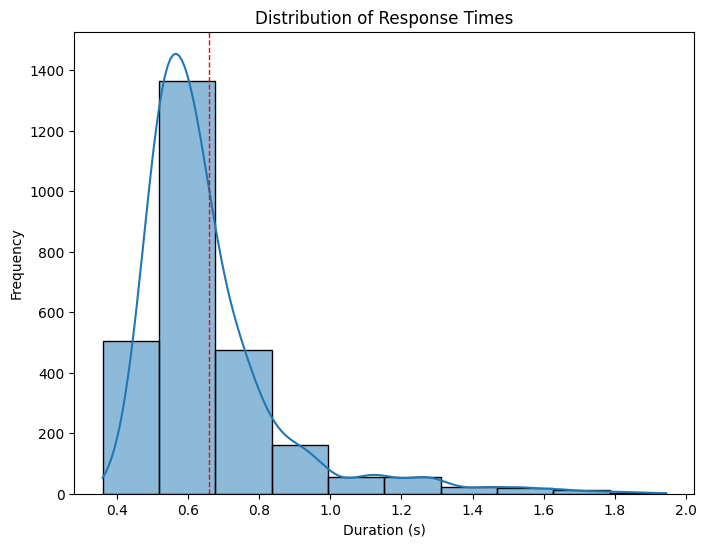

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df["duration"], bins=10, kde=True, edgecolor="black")
plt.axvline(df["duration"].mean(), color='r', linestyle='--', linewidth=1)
plt.title("Distribution of Response Times")
plt.xlabel("Duration (s)")
plt.ylabel("Frequency")
plt.show()


<Figure size 800x600 with 0 Axes>

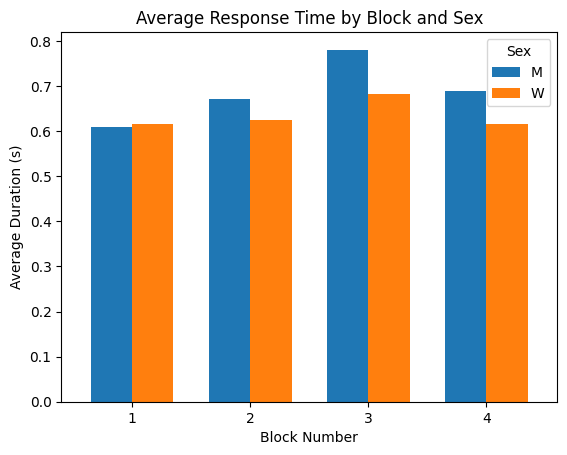

In [26]:
plt.figure(figsize=(8, 6))
df.groupby(['block_no', 'Sex'])['duration'].mean().unstack().plot(kind='bar', width=0.7)
plt.title("Average Response Time by Block and Sex")
plt.xlabel("Block Number")
plt.ylabel("Average Duration (s)")
plt.legend(title="Sex")
plt.xticks(rotation=0)
plt.show()

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/767381605.py:2: FutureWarning: The provided callable <function std at 0x105502a20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df['response_std'] = df.groupby('Sex')['duration'].transform(np.std)


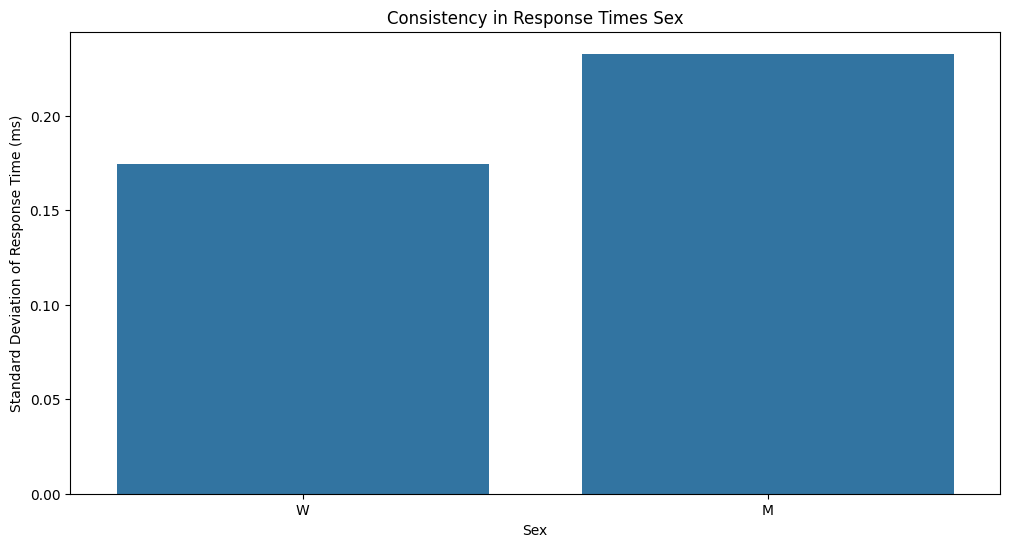

In [28]:
# 2. Participant Consistency by Sex
df['response_std'] = df.groupby('Sex')['duration'].transform(np.std)
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='response_std', data=df)
plt.title('Consistency in Response Times Sex')
plt.xlabel('Sex')
plt.ylabel('Standard Deviation of Response Time (ms)')
plt.show()

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/1290846233.py:2: FutureWarning: The provided callable <function std at 0x105502a20> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df['response_std_block'] = df.groupby('block_no')['duration'].transform(np.std)


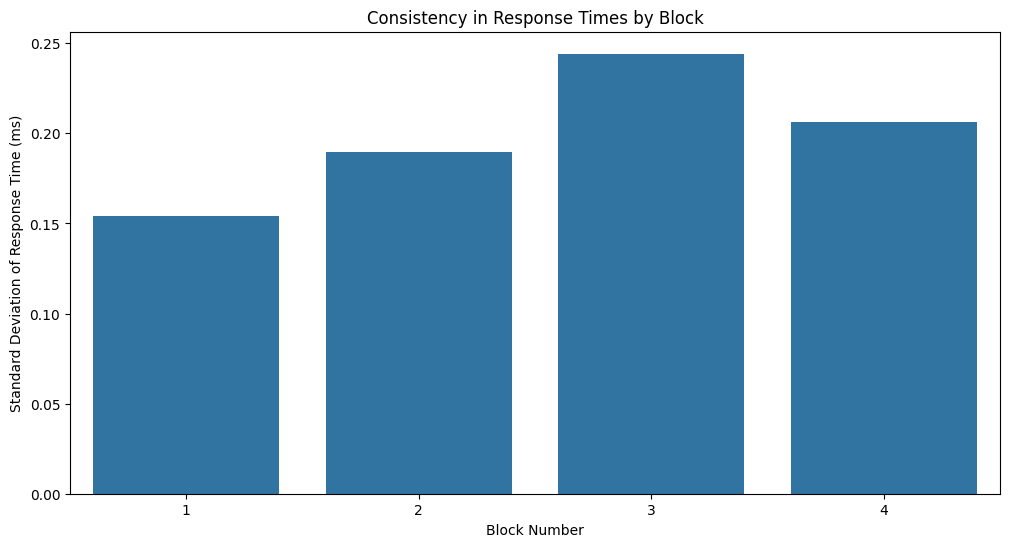

In [27]:
# 2. Participant Consistency by Block
df['response_std_block'] = df.groupby('block_no')['duration'].transform(np.std)
plt.figure(figsize=(12, 6))
sns.barplot(x='block_no', y='response_std_block', data=df)
plt.title('Consistency in Response Times by Block')
plt.xlabel('Block Number')
plt.ylabel('Standard Deviation of Response Time (ms)')
plt.show()

In [15]:
df.head()

,subject,block_no,duration,field,data_type,answer,eeg,desired_answer,label,Sex,Age,response_std,response_std_block
0,1299BF1A,1,0.840,BIRTH_DATE,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,0.174198,0.154316
1,1299BF1A,1,0.744,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,0.174198,0.154316
2,1299BF1A,1,0.676,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,0.174198,0.154316
3,1299BF1A,1,0.620,HOMETOWN,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,0.174198,0.154316
4,1299BF1A,1,0.652,NAME,REAL,YES,"<Epochs | 1 events (good & bad), 0 – 1 s (base...",YES,1,K,23,0.174198,0.154316


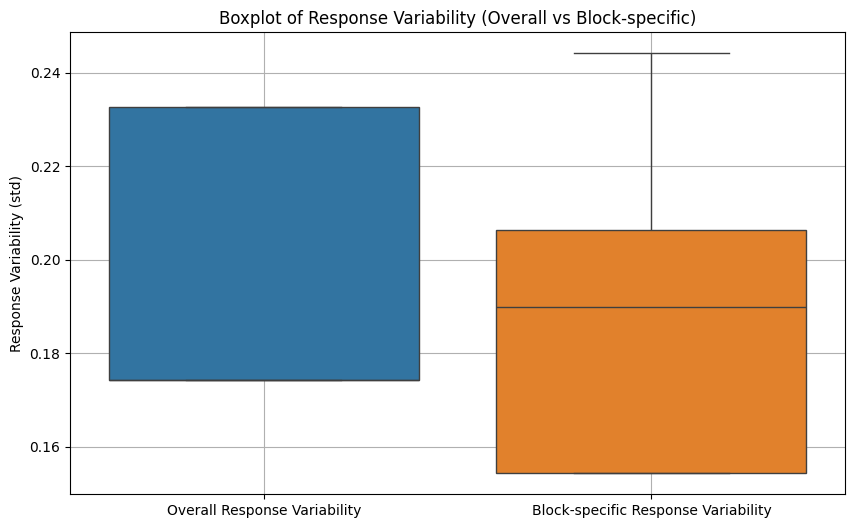

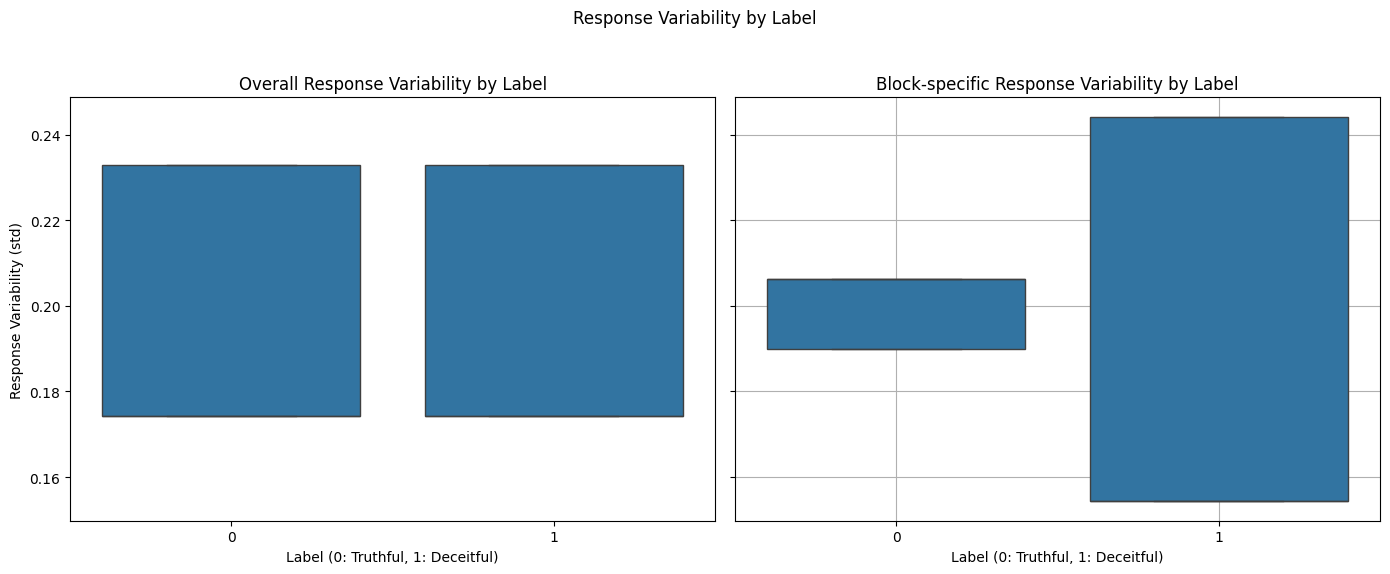

In [16]:
# Boxplot for Overall and Block-specific Response Variability
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['response_std', 'response_std_block']])
plt.xticks([0, 1], ['Overall Response Variability', 'Block-specific Response Variability'])
plt.title("Boxplot of Response Variability (Overall vs Block-specific)")
plt.ylabel("Response Variability (std)")
plt.grid(True)
plt.show()

# Boxplot of Response Variability by Label (Truthful vs Deceitful)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Overall response variability by label
sns.boxplot(x='label', y='response_std', data=df, ax=axes[0])
axes[0].set_title("Overall Response Variability by Label")
axes[0].set_xlabel("Label (0: Truthful, 1: Deceitful)")
axes[0].set_ylabel("Response Variability (std)")

# Block-specific response variability by label
sns.boxplot(x='label', y='response_std_block', data=df, ax=axes[1])
axes[1].set_title("Block-specific Response Variability by Label")
axes[1].set_xlabel("Label (0: Truthful, 1: Deceitful)")

plt.suptitle("Response Variability by Label")
plt.grid(True)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

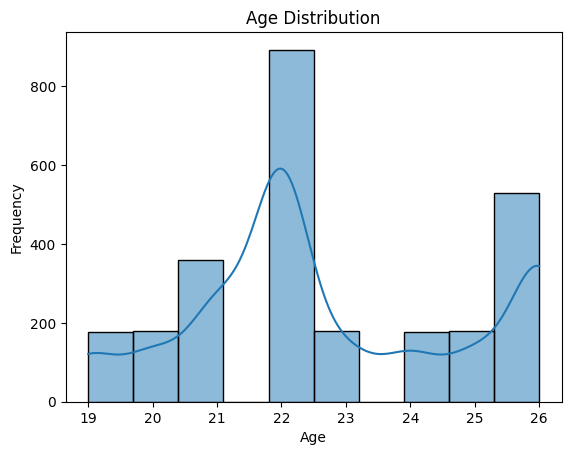

In [17]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


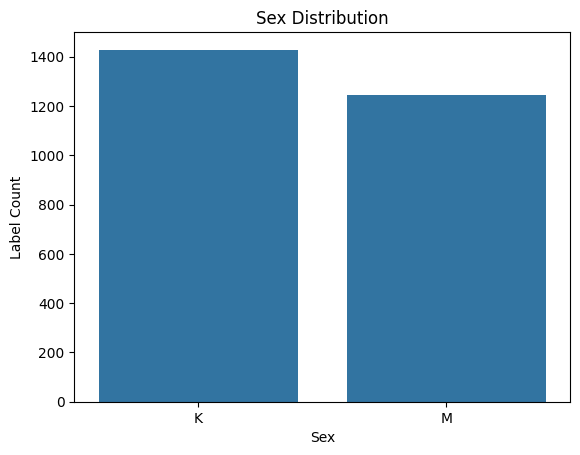

In [18]:
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Label Count')
plt.show()


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000g

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000g

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())


Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000g

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000g

0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using dat

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000g

Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 251 original time points ...
0 bad epochs dropped
Using data from preloaded Raw 

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 0 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/sps

Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/sps

Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/3564978876.py:1: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())


Using matplotlib as 2D backend.


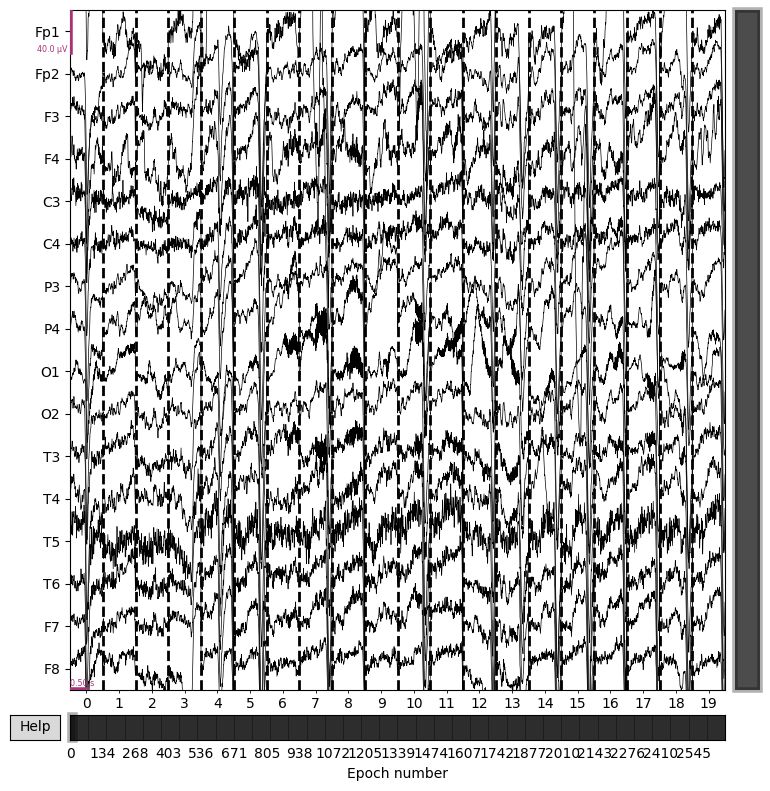

In [19]:
all_epochs = mne.concatenate_epochs(df['eeg'].values.tolist())
# Plot the concatenated epochs
all_epochs.plot()
plt.show()


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: One of the Epochs objects to concatenate was empty.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: One of the Ep

Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0w

Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:6: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:7: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs_label_1 = mne.concatenate_epochs(epochs_label_1)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:7: RuntimeWarning: 

Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:7: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_1 = mne.concatenate_epochs(epochs_label_1)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:7: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_1 = mne.concatenate_epochs(epochs_label_1)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:7: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_1 = mne.concatenate_epochs(epochs_label_1)
/var/folders/_j/spsz9h355yj3t0w

Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:7: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_1 = mne.concatenate_epochs(epochs_label_1)
/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:7: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_1 = mne.concatenate_epochs(epochs_label_1)


Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 1 events and 251 original time points ...
Using data f

/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/378186630.py:7: RuntimeWarning: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.
  all_epochs_label_1 = mne.concatenate_epochs(epochs_label_1)


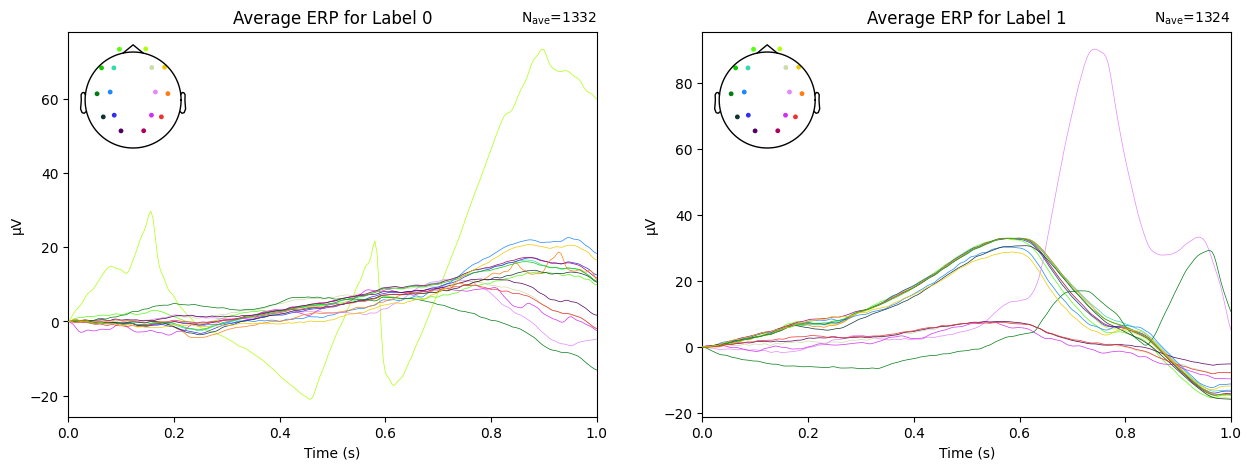

In [20]:
# Separate epochs by label
epochs_label_0 = [epoch for epoch, label in zip(df['eeg'], df['label']) if label == 0]
epochs_label_1 = [epoch for epoch, label in zip(df['eeg'], df['label']) if label == 1]

# Concatenate epochs for each label
all_epochs_label_0 = mne.concatenate_epochs(epochs_label_0)
all_epochs_label_1 = mne.concatenate_epochs(epochs_label_1)

# Create Evoked objects for each label
evoked_label_0 = all_epochs_label_0.average()
evoked_label_1 = all_epochs_label_1.average()

# Plot the average ERP for each label
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

evoked_label_0.plot(axes=axes[0], show=False)
axes[0].set_title('Average ERP for Label 0')

evoked_label_1.plot(axes=axes[1], show=False)
axes[1].set_title('Average ERP for Label 1')

plt.show()

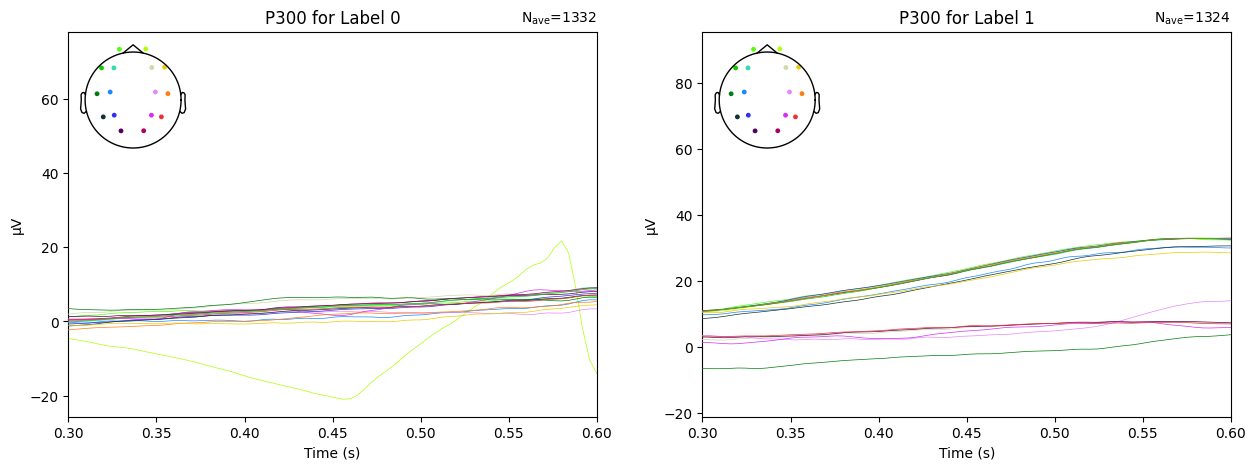

In [21]:
# Define the P300 time window
p300_window = (0.3, 0.6)

# Plot the average ERP for each label within the P300 time window
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

evoked_label_0.plot(axes=axes[0], time_unit='s', show=False)
axes[0].set_xlim(p300_window)
axes[0].set_title('P300 for Label 0')

evoked_label_1.plot(axes=axes[1], time_unit='s', show=False)
axes[1].set_xlim(p300_window)
axes[1].set_title('P300 for Label 1')

plt.show()


/var/folders/_j/spsz9h355yj3t0wcj2m2_pyh0000gn/T/ipykernel_76679/948840059.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


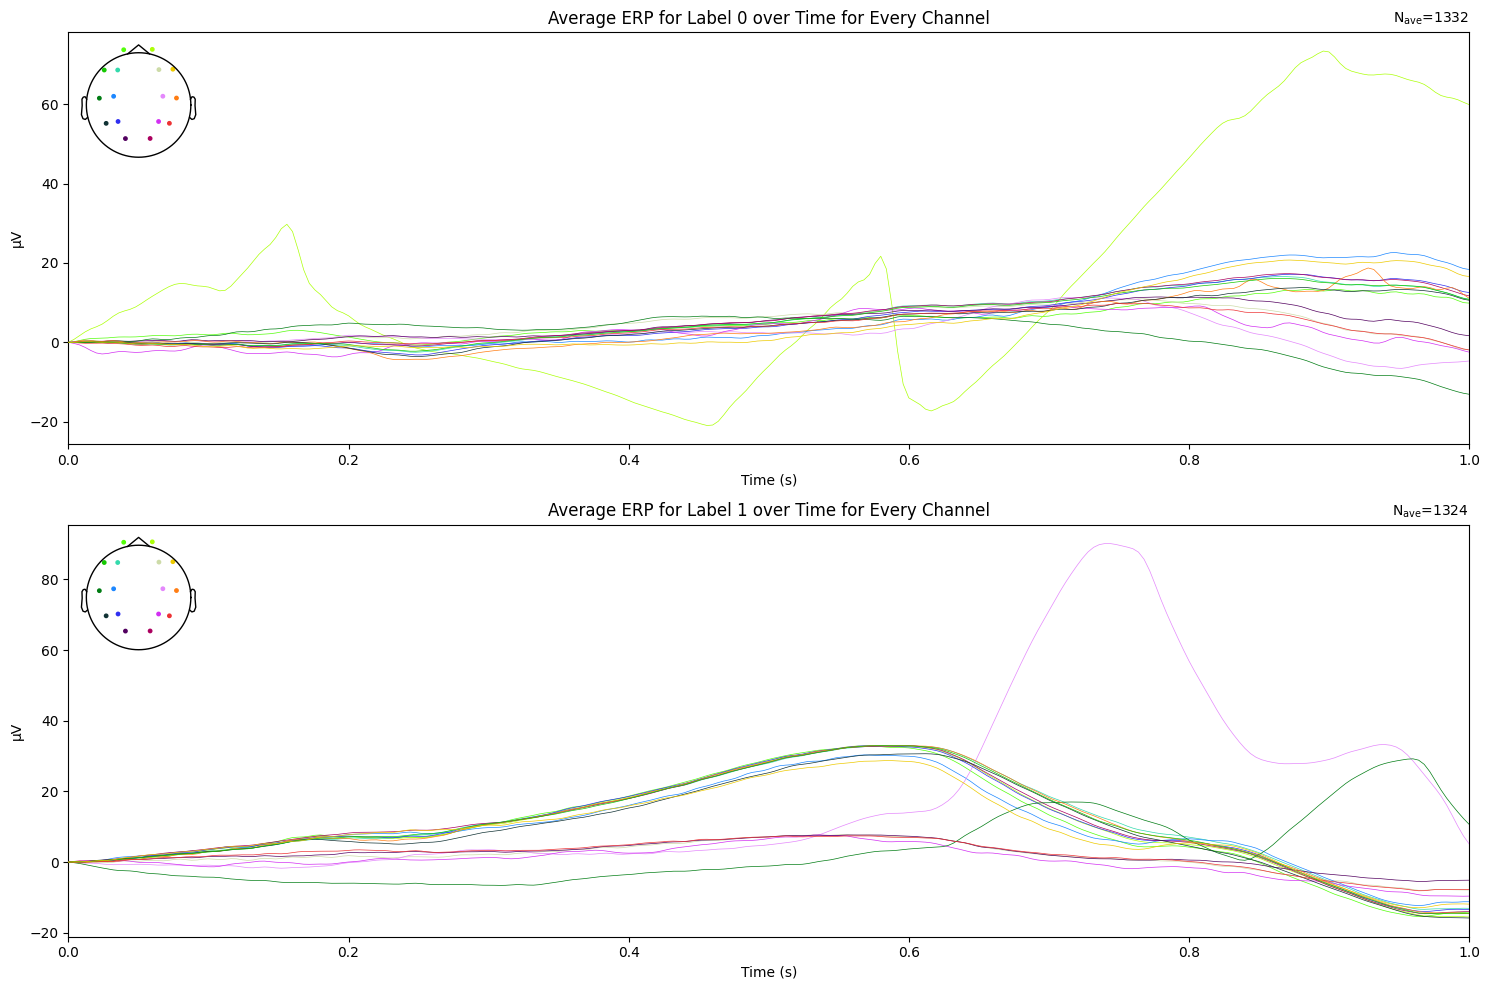

In [22]:
# Define the time window
time_window = (0, 1)  # Adjust the time window as needed

# Plot the average ERP for each label over time for every channel
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

evoked_label_0.plot(spatial_colors=True, axes=axes[0], time_unit='s', show=False)
axes[0].set_xlim(time_window)
axes[0].set_title('Average ERP for Label 0 over Time for Every Channel')

evoked_label_1.plot(spatial_colors=True, axes=axes[1], time_unit='s', show=False)
axes[1].set_xlim(time_window)
axes[1].set_title('Average ERP for Label 1 over Time for Every Channel')

plt.tight_layout()
plt.show()

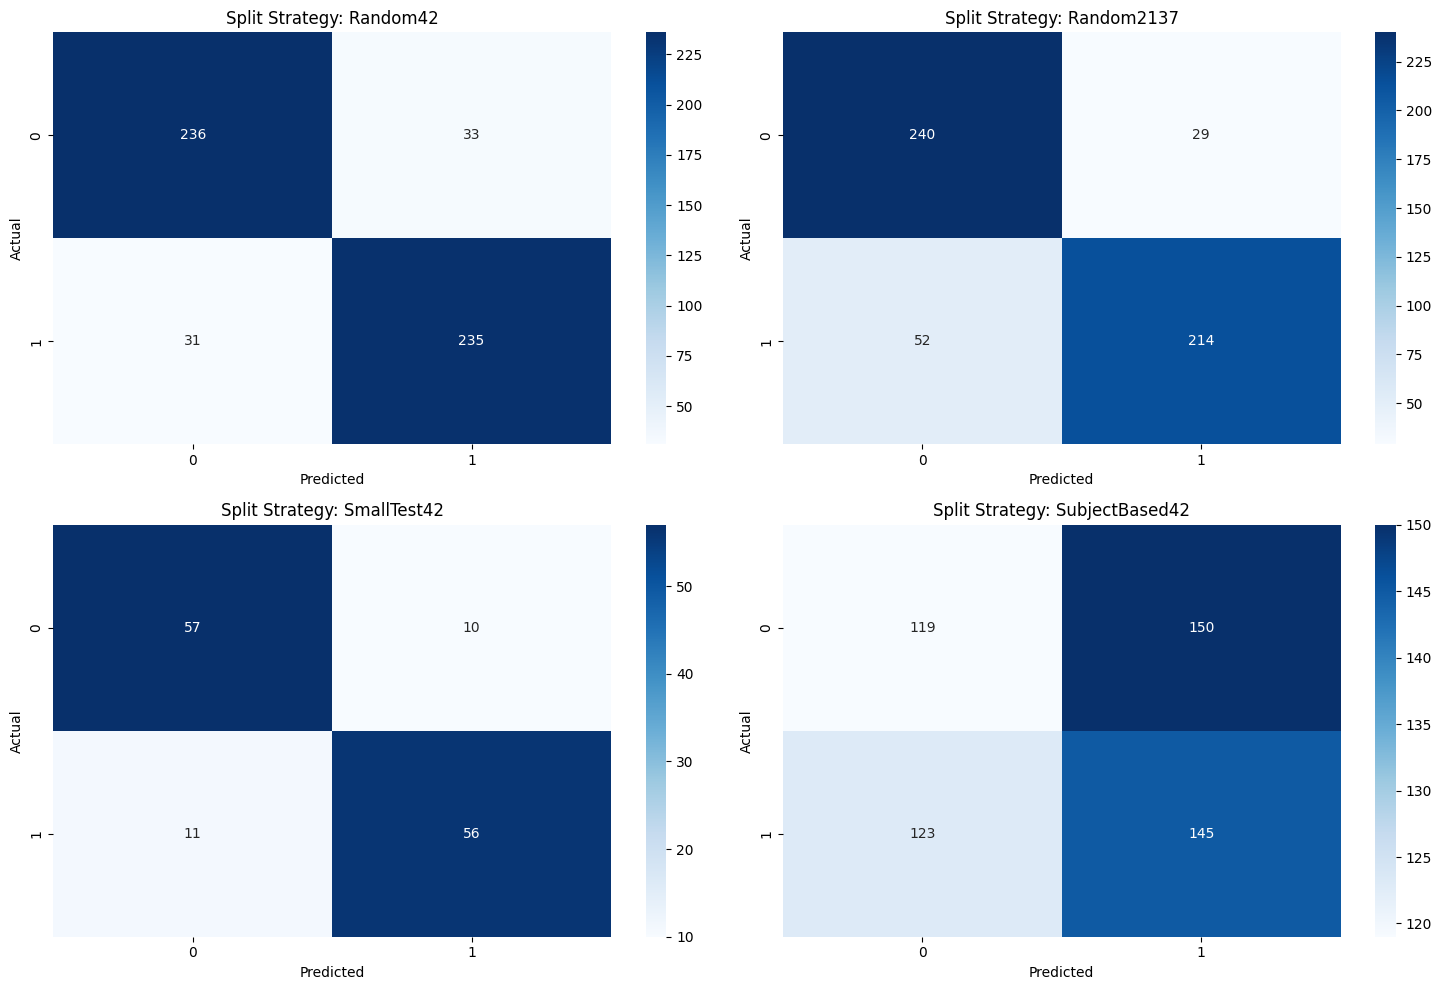

In [23]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define the data
results = [
    {"accuracy": 0.8803738317757009, "f1_score": 0.8801498127340824, "confusion_matrix": [[236, 33], [31, 235]], "metadata": {"person": "gs", "model": "RandomForestModel2024-11-18, 00:23:32", "additional_info": "RandomForestModel", "preprocess_params": {"lfreq": 0.3, "hfreq": 70, "notch_filter": [60], "baseline": [None, None], "tmin": 0, "tmax": 0.6}, "split_strategy": "Random42", "timestamp": "2024-11-18 00:23:32.163115"}},
    {"accuracy": 0.8485981308411215, "f1_score": 0.8408644400785854, "confusion_matrix": [[240, 29], [52, 214]], "metadata": {"person": "gs", "model": "RandomForestModel2024-11-18, 00:23:54", "additional_info": "RandomForestModel", "preprocess_params": {"lfreq": 0.3, "hfreq": 70, "notch_filter": [60], "baseline": [None, None], "tmin": 0, "tmax": 0.6}, "split_strategy": "Random2137", "timestamp": "2024-11-18 00:23:54.417170"}},
    {"accuracy": 0.8432835820895522, "f1_score": 0.8421052631578947, "confusion_matrix": [[57, 10], [11, 56]], "metadata": {"person": "gs", "model": "RandomForestModel2024-11-18, 00:24:17", "additional_info": "RandomForestModel", "preprocess_params": {"lfreq": 0.3, "hfreq": 70, "notch_filter": [60], "baseline": [None, None], "tmin": 0, "tmax": 0.6}, "split_strategy": "SmallTest42", "timestamp": "2024-11-18 00:24:17.873021"}},
    {"accuracy": 0.49162011173184356, "f1_score": 0.5150976909413855, "confusion_matrix": [[119, 150], [123, 145]], "metadata": {"person": "gs", "model": "RandomForestModel2024-11-18, 00:24:38", "additional_info": "RandomForestModel", "preprocess_params": {"lfreq": 0.3, "hfreq": 70, "notch_filter": [60], "baseline": [None, None], "tmin": 0, "tmax": 0.6}, "split_strategy": "SubjectBased42", "timestamp": "2024-11-18 00:24:38.812340"}}
]

# Plot the confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, result in zip(axes.flatten(), results):
    sns.heatmap(result["confusion_matrix"], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Split Strategy: {result['metadata']['split_strategy']}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

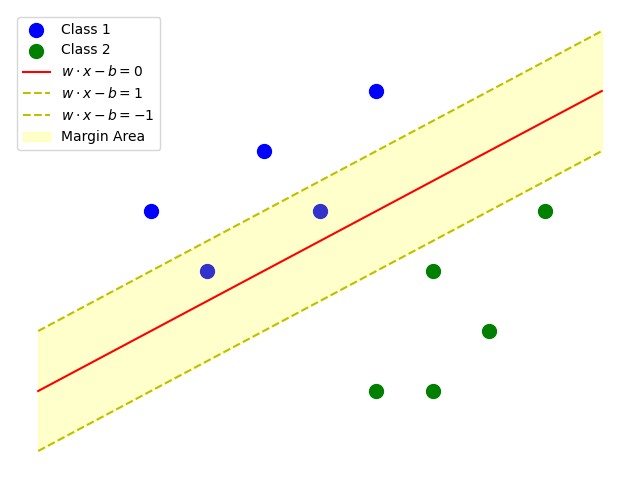

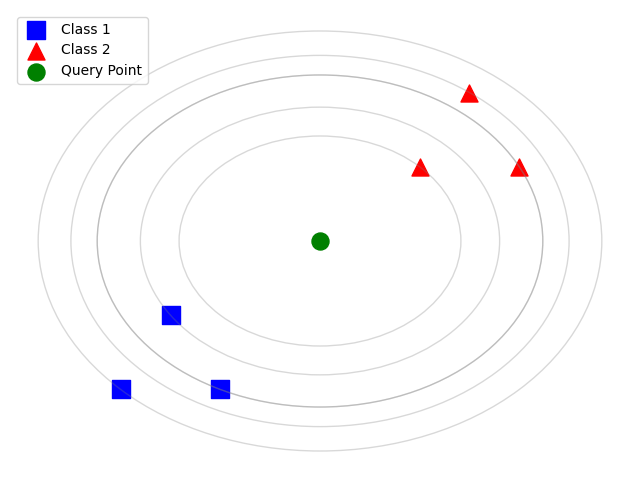

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# SVM Visualization (Theoretical)
def theoretical_svm():
    # Generate points for the margin and decision boundary
    x = np.linspace(0, 10, 100)
    decision_boundary = 0.5 * x + 2
    margin_1 = decision_boundary + 1
    margin_2 = decision_boundary - 1

    plt.figure(figsize=(8, 6))
    
    # Plot two classes of points
    class_1 = np.array([[2, 5], [4, 6], [6, 7], [3, 4], [5, 5]])
    class_2 = np.array([[7, 2], [8, 3], [6, 2], [7, 4], [9, 5]])
    
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', label='Class 1', s=100)
    plt.scatter(class_2[:, 0], class_2[:, 1], c='green', label='Class 2', s=100)

    # Plot decision boundary and margins
    plt.plot(x, decision_boundary, 'r-', label=r'$w \cdot x - b = 0$')
    plt.plot(x, margin_1, 'y--', label=r'$w \cdot x - b = 1$')
    plt.plot(x, margin_2, 'y--', label=r'$w \cdot x - b = -1$')
    
    plt.fill_between(x, margin_1, margin_2, color='yellow', alpha=0.2, label='Margin Area')
    plt.legend(loc="upper left")
    # plt.title("Theoretical SVM Visualization")
    plt.axis('off')
    plt.show()

# kNN Visualization (Theoretical)
def theoretical_knn():
    # Points for classes
    class_1 = np.array([[2, 2], [3, 2], [2.5, 3]])
    class_2 = np.array([[5, 5], [6, 5], [5.5, 6]])
    query_point = np.array([4, 4])  # Query point

    plt.figure(figsize=(8, 6))
    
    # Plot points and query point
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', s=150, label='Class 1', marker='s')
    plt.scatter(class_2[:, 0], class_2[:, 1], c='red', s=150, label='Class 2', marker='^')
    plt.scatter(query_point[0], query_point[1], c='green', s=150, label='Query Point', marker='o')
    
    # Draw circles around query point
    for point in np.vstack([class_1, class_2]):
        distance = np.linalg.norm(point - query_point)
        circle = plt.Circle(query_point, distance, color='gray', fill=False, alpha=0.3)
        plt.gca().add_patch(circle)

    # plt.title("Theoretical kNN Visualization")
    plt.legend(loc="upper left")
    plt.axis('off')
    plt.show()

# Execute the visualizations
theoretical_svm()
theoretical_knn()
